# Binomial is a specific type of a discrete probability distribution.

Example 1: Two players are playing basketball, player A and player B. Player A takes an average of 11 shots per game, and 
has an average success rate of 72%. Player B takes an average of 15 shots per game, but has an average success rate of 48%.

Question 1: What's the probability that Player A makes 6 shots in an average game?

Question 2: What's the probability that Player B makes 6 shots in an average game?

We can classify this as a binomial experiment if the following conditions are met:
    
    1.) The process consists of a sequence of n trials.
    2.) Only two exclusive outcomes are possible for each trial (A success and a failure)
    3.) If the probability of a success is 'p' then the probability of failure is q=1-p
    4.) The trials are independent.
    

The formula for a Binomial Distribution Probability Mass Function turns out to be:    

$$Pr(X=k)=C(n,k)p^k (1-p)^{n-k}$$

Where n= number of trials,k=number of successes,p=probability of success,1-p=probability of failure (often written as q=1-p).

This means that to get exactly 'k' successes in 'n' trials, we want exactly 'k' successes: $$p^k$$ 
and we want 'n-k' failures:$$(1-p)^{n-k}$$
Then finally, there are $$C(n,k)$$ ways of putting 'k' successes in 'n' trials.
So we multiply all these together to get the probability of exactly that many success and failures in those n trials!

--------------------------------------------------------------------------------------------------------------------------------

Quick note, C(n,k) refers to the number of possible combinations of N things taken k at a time.

This is also equal to: $$C(n,k) =  \frac{n!}{k!(n-k)!}$$

### So let's try out the example problem!

In [12]:
# Set up player A

# Probability of success for A
p_A = .72
# Number of shots for A
n_A = 11

# Make 6 shots
k = 6

# Now import scipy for combination
import scipy.special as sc

# Set up C(n,k)
comb_A = sc.comb(n_A,k)

# Now put it together to get the probability!
answer_A = comb_A * (p_A**k) * ((1-p_A)**(n_A-k))

# Put the answer in percentage form!
answer_A = 100*answer_A


# Quickly repeat all steps for Player B
p_B = .48
n_B = 15
comb_B = sc.comb(n_B,k)
answer_B = 100 * comb_B * (p_B**k) * ((1-p_B)**(n_B-k))


#Print Answers
print (' The probability of player A making 6 shots in an average game is %1.1f%% ' %answer_A)
print (' \n')
print (' The probability of player B making 6 shots in an average game is %1.1f%% ' %answer_B)

 The probability of player A making 6 shots in an average game is 11.1% 
 

 The probability of player B making 6 shots in an average game is 17.0% 


So now we know that even though player B is technically a worse shooter, because she takes more shots she will have a higher chance of making 6 shots in an average game!

But wait a minute... what about a higher amount of shots, will player's A higher probability take a stronger effect then?
What's the probability of making 9 shots a game for either player?

In [13]:
#Let's find out!

#Set number of shots
k = 9

#Set new combinations
comb_A = sc.comb(n_A,k)
comb_B = sc.comb(n_B,k)

# Everything else remains the same
answer_A = 100 * comb_A * (p_A**k) * ((1-p_A)**(n_A-k))
answer_B = 100 * comb_B * (p_B**k) * ((1-p_B)**(n_B-k))

#Print Answers
print (' \n')
print (' The probability of player A making 9 shots in an average game is %1.1f%% ' %answer_A)
print ('\n')
print (' The probability of player B making 9 shots in an average game is %1.1f%% ' %answer_B)
print ('\n')

 

 The probability of player A making 9 shots in an average game is 22.4% 


 The probability of player B making 9 shots in an average game is 13.4% 




Now we see that player's A ability level gives better odds of making exactly 9 shots. We need to keep in mind that we are asking
about the probability of making *exactly* those amount of shots. This is a different question than " What's the probability that player A makes *at least* 9 shots?".

## Now let's investigate the mean and standard deviation for the binomial distribution

The mean of a binomial distribution is simply: $$\mu=n*p$$

This intuitively makes sense, the average number of successes should be the total trials multiplied by your average success rate.

Similarly we can see that the standard deviation of a binomial is: $$\sigma=\sqrt{n*q*p}$$

So now we can ask, whats the average number of shots each player will make in a game +/- a standard distribution?

In [14]:
# Let's go ahead and plug in to the formulas.

# Get the mean
mu_A = n_A *p_A
mu_B = n_B *p_B

#Get the standard deviation
sigma_A = ( n_A *p_A*(1-p_A) )**0.5
sigma_B = ( n_B *p_B*(1-p_B) )**0.5

# Now print results
print( '\n')
print( 'Player A will make an average of %1.0f +/- %1.0f shots per game' %(mu_A,sigma_A))
print( '\n')
print( 'Player B will make an average of %1.0f +/- %1.0f shots per game' %(mu_B,sigma_B))
print( '\n')
print( "NOTE: It's impossible to make a decimal of a shot so '%1.0f' was used to replace the float!")



Player A will make an average of 8 +/- 1 shots per game


Player B will make an average of 7 +/- 2 shots per game


NOTE: It's impossible to make a decimal of a shot so '%1.0f' was used to replace the float!


## Let's see how to automatically make a binomial distribution.

In [15]:
from scipy.stats import binom

# We can get stats: Mean('m'), variance('v'), skew('s'), and/or kurtosis('k')
mean,var= binom.stats(n_A,p_A)

print(mean)
print(var**0.5)

7.92
1.4891608375189027


Looks like it matches up with our manual methods. Note: we did not round in this case.

## We can also get the probability mass function:
Let's try another example to see the full PMF (Probability Mass Function) and plotting it.

Imagine you flip a fair coin. Your probability of getting a heads is p=0.5 (success in this example).

So what does your probability mass function look like for 10 coin flips?

In [16]:
import numpy as np

# Set up a new example, let's say n= 10 coin flips and p=0.5 for a fair coin.
n=10
p=0.5

# Set up n success, remember indexing starts at 0, so use n+1
x = range(n+1)

# Now create the probability mass function
Y = binom.pmf(x,n,p)

#Show
Y

# Next we'll visualize the pmf by plotting it.

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507813,
       0.24609375, 0.20507813, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656])

## Finally, let's plot the binomial distribution to get the full picture.

Text(0, 0.5, 'Probability')

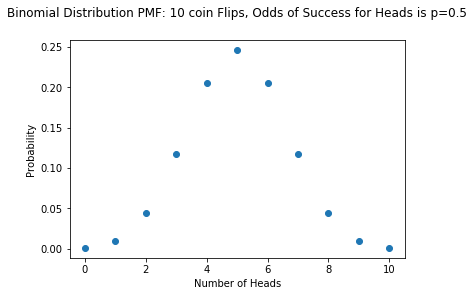

In [17]:
import matplotlib.pyplot as plt

# For simple plots, matplotlib is fine, seaborn is unnecessary.

# Now simply use plot
plt.plot(x,Y,'o')

#Title (use y=1.08 to raise the long title a little more above the plot)
plt.title('Binomial Distribution PMF: 10 coin Flips, Odds of Success for Heads is p=0.5',y=1.08)

#Axis Titles
plt.xlabel('Number of Heads')
plt.ylabel('Probability')



That's it for the review on Binomial Distributions. More info can be found at the following sources:

1.) http://en.wikipedia.org/wiki/Binomial_distribution

2.) http://stattrek.com/probability-distributions/binomial.aspx

3.) http://mathworld.wolfram.com/BinomialDistribution.html

Thanks!